# Watcharakorn Pasanta (6420422006)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dads6003-in-class-competition/sampleSubmission.csv
/kaggle/input/dads6003-in-class-competition/train.csv
/kaggle/input/dads6003-in-class-competition/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/dads6003-in-class-competition/train.csv')
train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,-10.731014,-166.447703,57.634618,5.851483,6.443051,773.535357,-425.516507,19.541551,102333.24180,37.515512,...,1.177903,4531.019914,65.320993,10.856422,42.317769,215.727832,9.922942,194.151039,-4.580311,0
1,-11.357862,-175.583196,61.413742,4.957525,6.022880,592.665369,-154.993322,17.165756,56410.00878,33.667832,...,6.288225,5745.900235,124.629610,19.519498,37.481917,193.590955,10.280823,159.152326,-4.361565,0
2,-19.008191,-266.301983,43.228042,5.173549,5.569678,912.741203,-337.001477,18.362978,37204.35472,24.194495,...,5.241047,5369.285274,136.536890,16.824492,31.761223,195.816664,9.604161,148.690528,-5.322491,1
3,-16.849847,-228.458742,45.440429,6.267129,4.125443,834.109486,-297.096954,16.375756,54967.23130,20.578061,...,2.316119,NaN,118.295834,19.972844,51.722932,210.446677,8.108592,310.539447,-5.205344,0
4,-11.518749,-345.861627,37.470283,6.178874,5.527774,634.255353,-243.072126,16.785630,62397.51981,39.815572,...,5.366404,6161.928292,61.414626,15.990853,51.659323,203.356424,12.552922,241.868249,-4.889072,1


In [3]:
#print(train.isnull().sum())
df = train.dropna()
print(df.isnull().sum())

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
y      0
dtype: int64


0    4451
1    1534
Name: y, dtype: int64


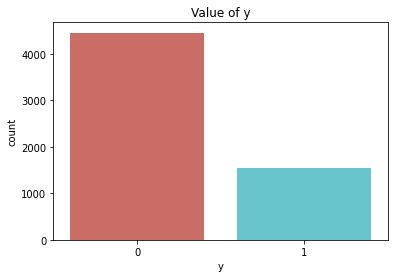

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

print(df['y'].value_counts())
sns.countplot(x='y',data=df, palette='hls')
plt.title('Value of y')
plt.show()


# **Final Adjustments to Data**

In [5]:
from sklearn.preprocessing import StandardScaler

df_final = df.copy()
features = df_final[['x'+str(i) for i in range(1,21)]]
scaler = StandardScaler().fit(features.values)
update_values = scaler.transform(features.values)


df_final[['x'+str(i) for i in range(1,21)]] = update_values 
df_final.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,1.421080,0.693875,0.905046,0.857595,1.445430,0.110570,-1.404288,0.290635,2.422297,0.899619,...,-1.572066,-0.451651,-1.636288,-0.985627,0.300578,0.363244,-0.031862,-1.179933,0.442582,0
1,1.210338,0.586143,1.154253,-0.051377,1.025267,-0.616569,1.666149,-0.183265,0.078349,0.422666,...,1.279989,0.767996,0.134102,0.551891,-0.307939,-0.180570,0.151627,-1.874197,0.664238,0
2,-1.361650,-0.483681,-0.044967,0.168275,0.572073,0.670209,-0.399643,0.055545,-0.901919,-0.751635,...,0.695562,0.389903,0.489540,0.073583,-1.027800,-0.125893,-0.195304,-2.081726,-0.309474,1
4,1.156248,-1.421908,-0.424651,1.190484,0.530169,-0.449368,0.666455,-0.259089,0.383955,1.184731,...,0.765524,1.185656,-1.752895,-0.074371,1.476068,0.059328,1.316550,-0.233375,0.129713,1
5,1.674116,0.086464,-0.113227,-0.297359,-0.388915,-0.430375,-1.894802,0.006669,1.242844,-0.698647,...,-0.194710,1.632567,-1.315471,-0.416705,1.706256,0.451350,0.166036,-1.416974,-0.966077,0


# ***Feature selection***
- Feature ranking with recursive feature elimination and cross-validation

Number of features selected: 10
Feature Ranking: [11  1  1  2  7  1  1  1  1  1 10  1  3  1  1  4  6  5  9  8]
Selected Features: ['x2', 'x3', 'x6', 'x7', 'x8', 'x9', 'x10', 'x12', 'x14', 'x15']


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


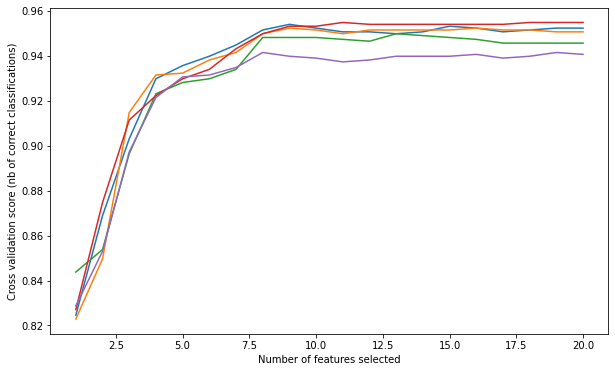

In [6]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor



X = df_final.loc[:,df_final.columns != 'y']
#print("X = ",X.head())
Y = df_final['y']
#print("Y = ",Y.head())


#regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
#rfe = RFE(regressor, n_features_to_select=10)
rfe = RFE(estimator=DecisionTreeClassifier())
rfe = rfe.fit(X, Y)
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X,Y)
print("Number of features selected: %s" % (rfe.n_features_))
print("Feature Ranking: %s" % (rfe.ranking_))
print('Selected Features: %s' % list(X.columns[rfe.support_]))

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

# **As we see,10 varibles as x2,x3,x6,x7,x8,x9,x10,x12,x14,x15 were kept.**

In [7]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(1,len(coefs)+1)]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
print ("Ridge model:", pretty_print_coefs(ridge.coef_))


Ridge model: 0.002 * X1 + -0.243 * X2 + -0.037 * X3 + 0.004 * X4 + -0.0 * X5 + 0.167 * X6 + 0.052 * X7 + 0.108 * X8 + -0.124 * X9 + 0.012 * X10 + 0.005 * X11 + 0.136 * X12 + 0.006 * X13 + -0.237 * X14 + -0.192 * X15 + -0.005 * X16 + 0.001 * X17 + -0.0 * X18 + -0.004 * X19 + 0.003 * X20


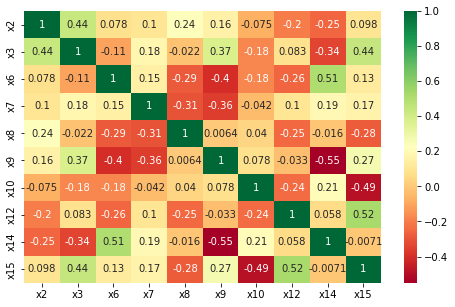

In [8]:
X=df_final[['x2', 'x3', 'x6', 'x7', 'x8', 'x9','x10', 'x12', 'x14', 'x15']]
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

# ******Training model**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

X=df_final[['x2', 'x3', 'x6', 'x7', 'x8', 'x9', 'x10', 'x12', 'x14', 'x15']].to_numpy()
Y=df_final['y'].to_numpy()


clf_log = LogisticRegression(random_state = 0)
clf_log.fit(X, Y)
print("Logistic")
print("Accuracy: %f" % clf_log.score(X, Y))


svm=SVC()
svm.fit(X,Y)
acc = svm.score(X,Y)
print("SVM")
print('Accuracy: ', acc)


knn=KNeighborsClassifier()
knn.fit(X,Y)
acc = knn.score(X, Y)
print("KNN")
print('Accuracy: ', acc)



dtc = DecisionTreeClassifier()
dtc.fit(X,Y)
acc = dtc.score(X,Y)
print("DTC")
print('Accuracy: ', acc)



clf = MLPClassifier(random_state=1, max_iter=300).fit(X, Y)
acccc = clf.score(X,Y)
print("NN")
print('Accuracy', acccc)



Logistic
Accuracy: 0.950209
SVM
Accuracy:  0.9883040935672515
KNN
Accuracy:  0.9884711779448622
DTC
Accuracy:  1.0
NN
Accuracy 0.9949874686716792


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# Model Evaulation

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4451
           1       1.00      0.98      0.99      1534

    accuracy                           0.99      5985
   macro avg       1.00      0.99      0.99      5985
weighted avg       0.99      0.99      0.99      5985

0    4470
1    1514
Name: Expected, dtype: int64


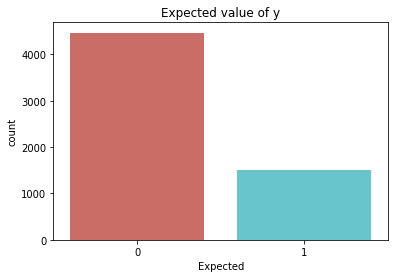

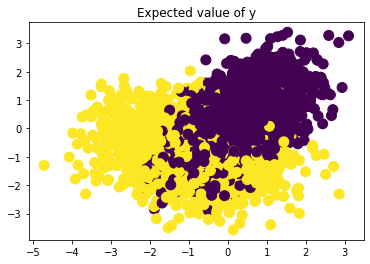

In [10]:
from sklearn.metrics import classification_report
from sklearn import linear_model
from scipy.special import expit

y_train_pred = clf.predict(X)
print(classification_report(Y, y_train_pred))

df = pd.DataFrame()
id = list(range(1,len(X)))
df['id']=pd.Series(id)
df['Expected']=pd.Series(y_train_pred)
print(df['Expected'].value_counts())


#Create graph
sns.countplot(x='Expected',data=df, palette='hls')
plt.title('Expected value of y')
plt.show()
plt.savefig('count_plot')

plt.title('Expected value of y')
plt.scatter(X[:,0],X[:,1],c=y_train_pred,s=100)



# Predict Value

In [11]:
df_test = pd.read_csv('/kaggle/input/dads6003-in-class-competition/test.csv')
df_test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,-14.880285,-413.657030,17.037929,5.627481,6.262187,704.164878,-269.815659,13.503896,60805.03782,31.065906,5.625478,5.150013,6282.637653,174.281276,19.959450,32.278906,206.323118,8.337124,232.140628,-5.120450
1,-13.987087,-235.197680,53.670585,4.743702,4.670301,1226.941573,-184.656449,7.034055,55445.68723,15.189238,15.746002,3.880180,3759.028105,32.216142,17.054081,35.934156,191.790254,10.985527,267.024627,-5.200961
2,-11.764850,-192.880170,38.687566,5.606648,4.147060,940.690132,-182.564985,17.218596,31562.61815,34.769586,12.766144,4.885215,6722.719526,181.736690,20.479688,33.809666,166.718488,7.087623,115.762593,-6.080712
3,-10.790193,-204.849932,50.837951,5.934410,5.310772,794.581702,-245.911853,9.936746,47299.76010,25.565751,14.068207,7.156563,5651.188202,127.570137,20.904829,49.857911,139.872041,9.597151,213.574163,-6.355565
4,-17.113392,-141.457819,53.246627,5.939751,5.631022,543.441438,-302.081360,21.861266,66725.53006,34.796947,13.834198,4.743589,5376.558510,119.269139,19.826086,39.903060,311.541001,12.573611,263.709173,-4.329967


In [12]:
df_test.dropna()
print(df.isnull().sum())

id          0
Expected    0
dtype: int64


In [13]:
df = df_test.copy()
features = df[['x'+str(i) for i in range(1,21)]]
scaler = StandardScaler().fit(features.values)
update_values = scaler.transform(features.values)


df[['x'+str(i) for i in range(1,21)]] = update_values 
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.046451,-2.225275,-1.823140,0.652070,1.257310,-0.194679,0.304902,-0.883773,0.319061,0.141315,-2.707939,0.656691,1.323474,1.643752,0.601550,-0.971904,0.162820,-0.847057,-0.441616,-0.154150
1,0.345140,-0.134658,0.635898,-0.228871,-0.323003,1.956466,1.250985,-2.137466,0.035397,-1.859363,1.307699,-0.055403,-1.263298,-2.643305,0.096016,-0.516826,-0.201950,0.492521,0.257075,-0.235526
2,1.088266,0.361084,-0.369866,0.631303,-0.842440,0.778585,1.274220,-0.163958,-1.228706,0.608029,0.125347,0.508198,1.774571,1.868732,0.692071,-0.781325,-0.831241,-1.479062,-2.772547,-1.124720
3,1.414196,0.220860,0.445752,0.958012,0.312812,0.177372,0.570464,-1.574997,-0.395758,-0.551780,0.641981,1.781918,0.676220,0.234164,0.766046,1.216681,-1.505077,-0.209728,-0.813483,-1.402523
4,-0.700310,0.963487,0.607439,0.963337,0.630733,-0.856031,-0.053556,0.735675,0.632425,0.611477,0.549131,0.428777,0.394717,-0.016333,0.578344,-0.022697,2.803748,1.295784,0.190670,0.644819


In [14]:
X_test=df[['x2', 'x3', 'x6', 'x7', 'x8', 'x9','x10', 'x12', 'x14', 'x15']].to_numpy()
y_test = clf.predict(X_test)
df = pd.DataFrame()
id = list(range(1,2501))
df['id']=pd.Series(id)
df['Expected']=pd.Series(y_test)
df.to_csv('submit.csv', index=False)
df.head()

,id,Expected
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0
